<a href="https://colab.research.google.com/github/vanithakattumuri/Hands-on-Pattern-Mining/blob/main/chapter9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 9: Utility Databases - Representation, Creation, and Statistics

## Install the PAMI library

In [1]:
!pip install --upgrade pami

zsh:1: command not found: pip


## Download the dataset

In [2]:
!wget -nc https://web-ext.u-aizu.ac.jp/~udayrage/datasets/utilityDatabases/Utility_T10I4D100K.csv

--2025-06-17 14:35:25--  https://web-ext.u-aizu.ac.jp/~udayrage/datasets/utilityDatabases/Utility_T10I4D100K.csv
Resolving web-ext.u-aizu.ac.jp (web-ext.u-aizu.ac.jp)... 163.143.103.34
Connecting to web-ext.u-aizu.ac.jp (web-ext.u-aizu.ac.jp)|163.143.103.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7356594 (7.0M) [text/csv]
Saving to: ‘Utility_T10I4D100K.csv’

Utility_T10I4D100K. 100%[===================>]   7.02M  6.35MB/s    in 1.1s    

2025-06-17 14:35:27 (6.35 MB/s) - ‘Utility_T10I4D100K.csv’ saved [7356594/7356594]



## Generic of Synthetic Utility Database

### Generic



```python

from PAMI.extras.syntheticDataGenerator  import utilityDatabase as db
  
# Create a UtilityDatabase object with specified parameters
obj = db.UtilityDataGenerator(
        databaseSize=totalNumberOfTransactions,
        avgItemsPerTransaction=averageItemsPerTransaction,
        numItems=totalNumberOfItemsInDatabase,
        minInternalUtilityValue=minimumInternalUtilityAnItemCanHaveInDatabase,
        maxInternalUtilityValue=maximumInternalUtilityAnItemCanHaveInDatabase,
        minExternalUtilityValue=minimumExternalUtilityAnItemCanHaveInDatabase,
        maxExternalUtilityValue=maximumExternalUtilityAnItemCanHaveInDatabase,
        sep='\t'
        )

# Generate the synthetic utility database
obj.Generate()

# Save the generated database to a CSV file
obj.Save('utilityDatabase.csv')

# Read the generated transactions into a dataframe
utilityDataFrame = obj.GetUtilityData()
print(utilityDataFrame)
```



### Example 1

In [3]:
from PAMI.extras.syntheticDataGenerator import UtilityDatabase as db

# Create a UtilityDatabase object with specified parameters
obj = db.UtilityDatabase(
        databaseSize=100000,
        avgItemsPerTransaction=10,
        numItems=1000,
        minInternalUtilityValue=1,
        maxInternalUtilityValue=100,
        minExternalUtilityValue=100,
        maxExternalUtilityValue=1000)

obj.create()

# Save the generated database to a CSV file
obj.save('utilityDatabase.csv')

# Read the generated utility transactions into a dataframe
utilityDataFrame = obj.GetUtilityData()
print(utilityDataFrame)

       Entry ID                                            Entries    Sum
0             1  [22, 24, 95, 51, 20, 88, 50, 16, 39, 25, 5, 65...  52050
1             2  [55, 5, 20, 21, 65, 57, 65, 75, 99, 34, 30, 66...  50054
2             3  [11, 9, 93, 40, 10, 68, 30, 44, 49, 21, 90, 93...  48971
3             4  [86, 98, 9, 91, 72, 54, 68, 6, 82, 86, 7, 71, ...  49364
4             5  [84, 90, 17, 91, 86, 42, 82, 63, 85, 81, 34, 5...  51523
...         ...                                                ...    ...
99995     99996  [5, 18, 49, 18, 72, 51, 37, 84, 36, 24, 74, 25...  50941
99996     99997  [34, 37, 59, 68, 81, 99, 45, 24, 39, 67, 47, 2...  50459
99997     99998  [11, 64, 17, 5, 49, 73, 78, 51, 18, 66, 87, 8,...  48687
99998     99999  [89, 43, 36, 89, 80, 47, 96, 2, 54, 10, 55, 88...  50924
99999    100000  [64, 82, 36, 83, 32, 96, 42, 26, 85, 32, 56, 2...  51493

[100000 rows x 3 columns]


## Converting a DataFrame into a Utility Database

### Generic code



```python

from PAMI.extras.convert import DF2DB as alg
import pandas as pd
import numpy as np

#creating a 4 x 4 dataframe with random values
data = np.random.randint(1, 100, size=(4, 4))
dataFrame = pd.DataFrame(data_4x4,
             columns=['Item1', 'Item2', 'Item3', 'Item4']
            )
#converting the database into a transactional database by
#considering values greater than or equal to 36
obj = alg.DF2DB(dataFrame)
obj.convert2UtilityDatabase(oFile='utilityDB.csv')
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 2

In [4]:
from PAMI.extras.convert import DF2DB as alg
import pandas as pd
import numpy as np

#creating a 4 x 4 dataframe with random values
data = np.random.randint(1, 100, size=(4, 4))
dataFrame = pd.DataFrame(data,
             columns=['Item1', 'Item2', 'Item3', 'Item4']
            )
#converting the database into a utility transactional database.
obj = alg.DF2DB(dataFrame)
obj.convert2UtilityDatabase(oFile='utilityDB.csv')
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Runtime: 0.0024650096893310547
Memory (RSS): 683769856
Memory (USS): 650313728


In [5]:
!head utilityDB.csv

Item1	Item2	Item3	Item4:128:18	4	13	93
Item1	Item2	Item3	Item4:230:40	63	41	86
Item1	Item2	Item3	Item4:190:90	8	56	36
Item1	Item2	Item3	Item4:145:50	30	28	37


__Format of utility database:__ items:_totalUtility_:_itemsUtilityValues_

## Getting the Statistical Details of the Database

### Generic code



```python
from PAMI.extras.dbStats import UtilityDatabase as stat

obj = stat.UtilityDatabase("inputFileName")
obj.run()
obj.printStats()
obj.plotGraphs()
```



### Example 3

Database size : 99935
Number of items : 870
Minimum Transaction Size : 1
Average Transaction Size : 10.101836193525791
Maximum Transaction Size : 29
Minimum utility : 75
Average utility : 58042.54712643678
Maximum utility : 389886
Standard Deviation Transaction Size : 3.667097909135199
Variance : 13.447741640067324
Sparsity : 0.9883886940304302


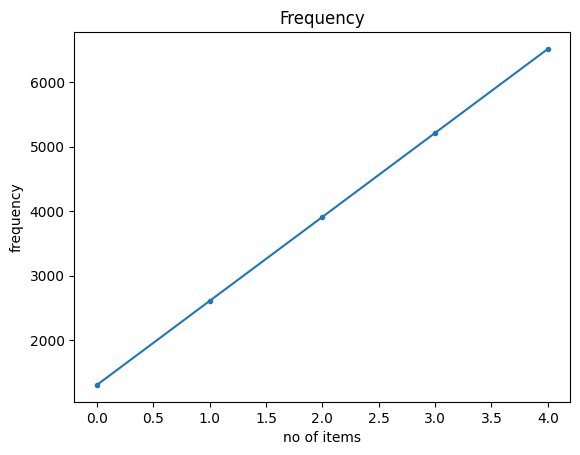

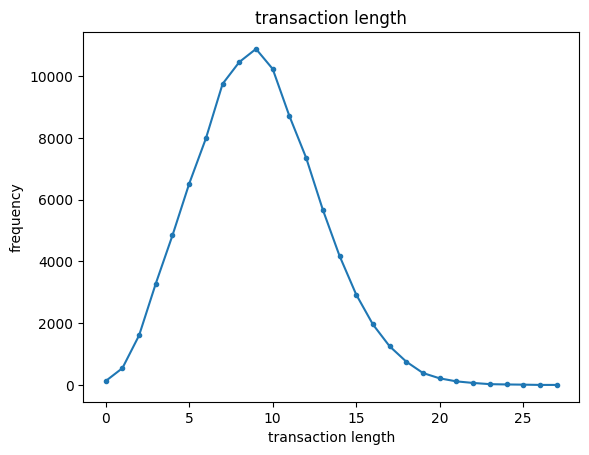

In [6]:
from PAMI.extras.dbStats import UtilityDatabase as stat

obj = stat.UtilityDatabase("Utility_T10I4D100K.csv")
obj.run()
obj.printStats()
obj.plotGraphs()